In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("survey_lung_cancer.csv")

In [5]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
df.shape

(309, 16)

- We can see most of the categorical features are already encoded, we need to encode Gender

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
# Lets check for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

- We dont have any null values in our dataset

In [9]:
df.duplicated().sum()

33

In [10]:
df[df.duplicated()==True]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
99,M,56,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
100,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
212,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
223,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
256,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
275,M,64,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
284,M,58,2,2,2,2,2,1,1,1,2,1,1,2,2,YES
285,F,58,2,2,2,2,1,2,1,1,1,2,2,2,1,YES


In [11]:
# Encoding the GENDER Column to -> 1 - M, 2 - F
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 2})

In [12]:
df['GENDER'].head()

0    1
1    1
2    2
3    1
4    2
Name: GENDER, dtype: int64

In [13]:
# Lets first use decision tree classifer, this only needs int or float
df2 = df
df2['LUNG_CANCER'] = df2['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

- All the datatypes of df2 are now int
- GENDER -> Male = 1, Female = 2
- LUNG_CANCER -> YES = 1, NO = 0

### Lets Predict the LUNG_CANCER of a Patient
#### Using Decision Tree Classifer

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve


In [16]:
# Lets split the data
features = df2.drop(columns= ['LUNG_CANCER'])
target = df2['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=56, test_size= 0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=66)

In [17]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
70,1,68,2,2,2,2,1,1,2,1,2,1,1,2,2
303,1,51,1,2,1,1,2,2,2,2,2,2,2,1,2
287,2,51,2,2,2,2,1,2,1,1,1,1,2,2,1
168,1,44,1,2,1,2,2,2,1,2,1,1,2,2,2
89,2,55,2,1,1,2,2,2,2,2,2,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,1,63,2,2,2,1,2,2,2,2,1,1,2,1,1
285,2,58,2,2,2,2,1,2,1,1,1,2,2,2,1
263,2,71,1,2,1,1,2,2,2,2,1,2,2,1,1
5,2,75,1,2,1,1,2,2,2,2,1,2,2,1,1


In [18]:
y_train
# the feature - LUNG_CANCER

70     1
303    1
287    1
168    1
89     1
      ..
223    1
285    1
263    1
5      1
226    1
Name: LUNG_CANCER, Length: 172, dtype: int64

In [19]:
# Lets initialize and train our Decision Tree Classifier
model = DecisionTreeClassifier(random_state=55)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=55)

In [20]:
# Validate the model
y_val_pred = model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred, output_dict=True)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
print(f'Validation Accuracy score is: {accuracy_val}')
print(f"Classification report \n {classification_report(y_val, y_val_pred)}")

Validation Accuracy score is: 0.8636363636363636
Classification report 
               precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.89      0.94      0.92        35

    accuracy                           0.86        44
   macro avg       0.80      0.75      0.77        44
weighted avg       0.86      0.86      0.86        44



#### Inference of our Validation results
- 86.36% of our validation set's predictions were correct.
#### When the model predicted 0
- Precision - When the model predicted 0, it was correct 71% of the time
- Recall - Out of all class 0 instances, the model correctly identified 56% of them
- F1 Score - 0.63 - The harmonic mean of precision and recall for class 0.
#### When the model predicted 1
- Precision - When the model predicted 1, it was correct 89% of the time
- Recall - Out of all class 1 instances, the model correctly identified 94% of them
- F1 Score - 0.92 - The harmonic mean of precision and recall for class 1.

In [21]:
# Lets test the model
y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred, output_dict= True)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f'Test Accuracy score is: {accuracy_test}')
print(f'Classification report \n {classification_report(y_test, y_test_pred)}')

Test Accuracy score is: 0.9032258064516129
Classification report 
               precision    recall  f1-score   support

           0       0.43      0.86      0.57         7
           1       0.99      0.91      0.95        86

    accuracy                           0.90        93
   macro avg       0.71      0.88      0.76        93
weighted avg       0.95      0.90      0.92        93



#### Inference of our Test results
- 90.32% of our Test set's predictions were correct.
#### When the model predicted 0
- Precision - When the model predicted 0, it was correct 43% of the time
- Recall - Out of all class 0 instances, the model correctly identified 86% of them
- F1 Score - 0.57 - The harmonic mean of precision and recall for class 0.
#### When the model predicted 1
- Precision - When the model predicted 1, it was correct 99% of the time
- Recall - Out of all class 1 instances, the model correctly identified 91% of them
- F1 Score - 0.95 - The harmonic mean of precision and recall for class 1.

#### Conclusion of Decision Tree Classifier
- The model shows promise in prediction of Lung cancer
- But there is some imbalance in prediction of non cancer cases

#### Precision
- Precision is the ratio of correctly predicted positive observations to the total predicted positives.
- PRECISION = TP/(TP+FP)
- TP = True Positives
- FP = False Positives
#### Recall (Sensitivity or True Positive Rate):
- Recall is the ratio of correctly predicted positive observations to all observations in the actual class
- RECALL = TP/(TP+FN)
- FN = False Negative
#### F1-Score:
- The F1-Score is the weighted average of Precision and Recall. It is particularly useful when you need a balance between Precision and Recall.
- F1 Score = 2 * [(PRECISION*RECALL)/(PRECISION+RECALL)]
#### Support:
- Support is the number of actual occurrences of the class in the dataset.
#### Accuracy
- Accuracy is the ratio of correctly predicted observations to the total observations.
- ACCURACY = (TP+TN)/(TP+TN+FP+FN)
#### Macro Average:
- The macro average is the arithmetic mean of precision, recall, and F1-score for each class. It treats all classes equally, regardless of their support.
#### Weighted Average:
- The weighted average accounts for the support of each class, providing a weighted mean of precision, recall, and F1-score.


### Visualization
#### Confusion Matrix
- Confusion Matrix: Shows the number of correct and incorrect predictions for each class.

In [22]:
def confusion_matrix_plot(conf_matrix, title):
    plt.figure(figsize = (8, 6))
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

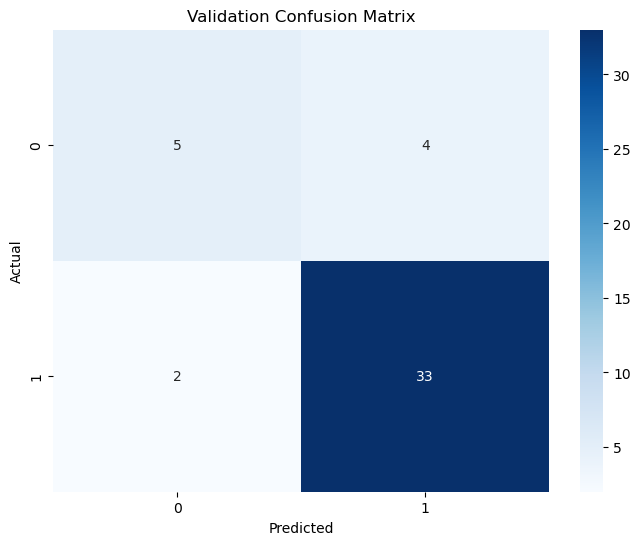

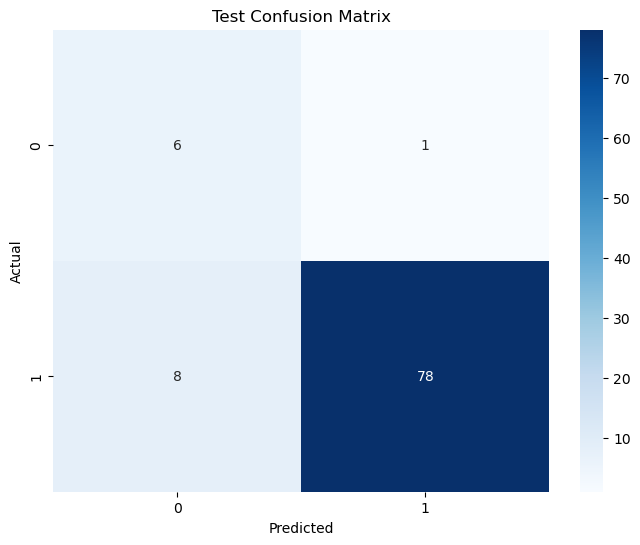

In [23]:
confusion_matrix_plot(val_conf_matrix, 'Validation Confusion Matrix')
confusion_matrix_plot(test_conf_matrix, 'Test Confusion Matrix')

#### Validation Confusion Matrix
- True Positives (TP): 33
- True Negative (TN): 5
- False Positive (FP): 4
- False Negative (FN): 2
#### Test Confusion Matrix
- True Positives (TP): 78
- True Negative (TN): 6
- False Positive (FP): 1
- False Negative (FN): 8

#### ROC Curve
- The ROC (Receiver Operating Characteristic) curve is a graphical representation used to evaluate the performance of a binary classification system, and it is particularly useful for examining the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate) at various threshold settings.
- **FPR (False Positive Rate)**: It measures how often the model incorrectly classifies a negative instance as positive. 
- **TPR (True Positive Rate):** Also known as Recall or Sensitivity, it measures how often the model correctly classifies a positive instance as positive. 

In [25]:
# The below function calculates the fpr, tpr and corresponding  thresholds for different cutoffs of a 
# classifier's output probabilities (only the probabilities for the positive class are considered, hence [:,1]).
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Calculating the area under the curve
roc_auc = auc(fpr, tpr)

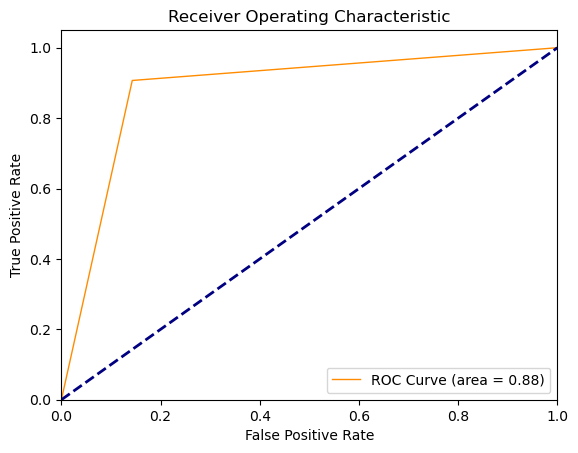

In [28]:
# Lets plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 1, label = "ROC Curve (area = %0.2f)" %roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
# Set the limits of the x and y axis
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

- The ROC curve quickly rises towards the upper-left corner of the plot, which suggests that your model has a high true positive rate (TPR) while maintaining a low false positive rate (FPR) across various thresholds. 
- The area under the curve is 0.88, this is close to 1

In [29]:
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### Conclusion of Decision Tree Classifier Prediction
- The Decision Tree Classifier is highly effective at identifying positive cases (lung cancer), with a very high precision in both validation and testing datasets. This suggests that the model is very reliable when it predicts that a patient has lung cancer, with few false positives.
- The model shows lower precision in predicting the negative class, particularly in the testing dataset. This means that a significant number of negative predictions (no lung cancer) are incorrect, leading to a higher rate of false negatives. 
- The overall accuracy of your model is quite high. This indicates that for the majority of cases, the model is able to correctly identify whether lung cancer is present or not. 
- From the ROC Curve we can see the diagonal dashed line represents a no-skill classifier; a classifier that guesses randomly will have its ROC curve lie along this line, corresponding to an AUC of 0.5. Your model's ROC curve is well above this line, which confirms that the classifier performs significantly better than random guessing.